In [53]:
import pandas as pd
import numpy as np

In [74]:
df= pd.read_csv('Ecommerce.csv')
df.head()

,Order_ID,Customer_ID,Order_Value,Order_Date,Ship_Date,Delivery_Days,Product_Category,Payment_Method,Delivery_Status
0,1,1037,352.92,01-01-2021,02-01-2021,7,Fashion,PayPal,In Transit
1,2,1012,74.96,02-01-2021,03-01-2021,6,Health & Beauty,Debit Card,Delivered
2,3,1072,120.91,03-01-2021,04-01-2021,1,Fashion,Debit Card,Delivered
3,4,1009,322.30,04-01-2021,05-01-2021,3,Home & Living,PayPal,Delivered
4,5,1075,193.65,05-01-2021,06-01-2021,11,Health & Beauty,Cash on Delivery,Delivered


In [55]:
df.isnull().sum().any()

False

Exploratory Data analysis

In [56]:
#a Calculate the total number of orders and the average order value.

total_orders= df['Order_ID'].count()
avg_ord_val= df['Order_Value'].mean()
print("total_orders: ", total_orders)
print("average_order_value:", avg_ord_val)

total_orders:  500
average_order_value: 276.88752


In [57]:
#b Determine the most popular product category.
df.groupby('Product_Category')['Product_Category'].count()

# health and beauty is the most popular category

Product_Category
Books               98
Electronics         98
Fashion             97
Health & Beauty    112
Home & Living       95
Name: Product_Category, dtype: int64

array([[<Axes: title={'center': 'Order_Value'}>]], dtype=object)

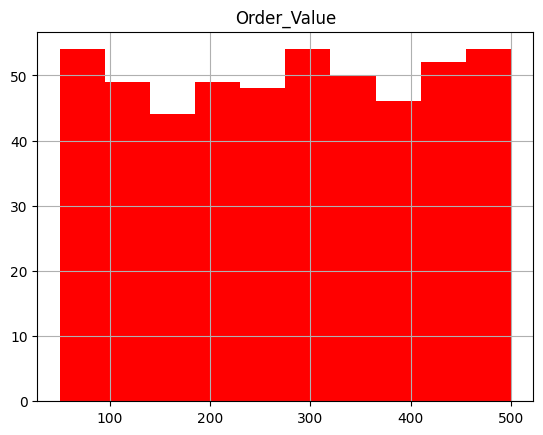

In [58]:
# Analyze the distribution of order values using a histogram
import seaborn as sns
df.hist('Order_Value' ,color = 'red')

In [37]:
#Investigate if there's a difference in average order value by payment method.

df.groupby('Payment_Method')['Order_Value'].mean()

#each payment method has slight difference in their payment method.

Payment_Method
Cash on Delivery    271.524274
Credit Card         295.704687
Debit Card          270.881985
PayPal              268.709487
Name: Order_Value, dtype: float64

In [39]:
#Assess the frequency of each delivery status
df.groupby('Delivery_Status')["Order_ID"].count()

Delivery_Status
Cancelled      18
Delivered     435
In Transit     47
Name: Order_ID, dtype: int64

In [40]:
# Determine the average number of orders per customer.
df.groupby('Customer_ID')['Order_ID'].count()

Customer_ID
1000    5
1001    3
1002    6
1003    5
1005    5
       ..
1095    1
1096    7
1097    4
1098    6
1099    3
Name: Order_ID, Length: 98, dtype: int64

<Axes: xlabel='Order_Value', ylabel='Delivery_Days'>

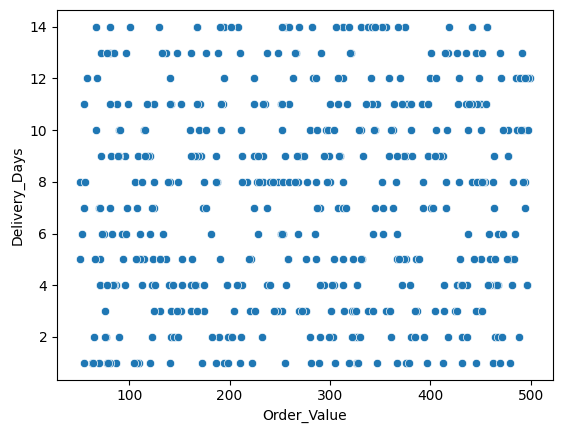

In [59]:
# Analyze the relationship between order value and delivery days using a scatter plot

sns.scatterplot(data=df, x='Order_Value', y='Delivery_Days')

In [75]:
#Explore which day of the week has the highest number of orders

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['weekday'] = df['Order_Date'].dt.day_name()
df.groupby('weekday')['Order_ID'].count().sort_values(ascending=False)


<ipython-input-75-79a61b2ab1d6>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order_Date'] = pd.to_datetime(df['Order_Date'])


weekday
Friday       73
Saturday     73
Sunday       72
Monday       71
Thursday     71
Tuesday      70
Wednesday    70
Name: Order_ID, dtype: int64

In [ ]:
# Find out the Delivery date for Each order


In [80]:
# Find out the Delivery date for Each order

df['Delivery_Date'] = df['Order_Date'] + pd.to_timedelta(df['Delivery_Days'], unit='d')
df.head()

,Order_ID,Customer_ID,Order_Value,Order_Date,Ship_Date,Delivery_Days,Product_Category,Payment_Method,Delivery_Status,weekday,Delivery_Date
0,1,1037,352.92,2021-01-01,02-01-2021,7,Fashion,PayPal,In Transit,Friday,2021-01-08
1,2,1012,74.96,2021-02-01,03-01-2021,6,Health & Beauty,Debit Card,Delivered,Monday,2021-02-07
2,3,1072,120.91,2021-03-01,04-01-2021,1,Fashion,Debit Card,Delivered,Monday,2021-03-02
3,4,1009,322.30,2021-04-01,05-01-2021,3,Home & Living,PayPal,Delivered,Thursday,2021-04-04
4,5,1075,193.65,2021-05-01,06-01-2021,11,Health & Beauty,Cash on Delivery,Delivered,Saturday,2021-05-12


68-95-99.7 rule analysis on Order_value column

In [94]:
total_count1= df['Order_Value'].count()

desired_val1=df[(df['Order_Value']>= (df['Order_Value'].mean()-df['Order_Value'].std())) &
(df['Order_Value']< (df['Order_Value'].mean() + df['Order_Value'].std()))]['Order_Value'].count()

rule_65 = desired_val/total_count1
print(f'the percentages of order values that fall within one standard deviation is:  {rule_65}')

the percentages of order values that fall within one standard deviation is:  0.566


In [100]:
total_count2= df['Order_Value'].count()

desired_val2=df[(df['Order_Value']>= (df['Order_Value'].mean()-2*df['Order_Value'].std())) &
(df['Order_Value']< (df['Order_Value'].mean() + 2*df['Order_Value'].std()))]['Order_Value'].count()

rule_95 = desired_val2/total_count2
print(f'the percentages of order values that fall within two standard deviation is:  {rule_95}')

the percentages of order values that fall within two standard deviation is:  1.0


In [99]:
total_count3= df['Order_Value'].count()

desired_val3=df[(df['Order_Value']>= (df['Order_Value'].mean()-3*df['Order_Value'].std())) &
(df['Order_Value']< (df['Order_Value'].mean() + 3*df['Order_Value'].std()))]['Order_Value'].count()

rule_99 = desired_val3/total_count3
print(f'the percentages of order values that fall within three standard deviation is:  {rule_99}')

the percentages of order values that fall within three standard deviation is:  1.0


useful visualizations

<ipython-input-102-56c648c3f1c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Order_Value'], bins=10, kde=True)


AttributeError: module 'matplotlib' has no attribute 'xlabel'

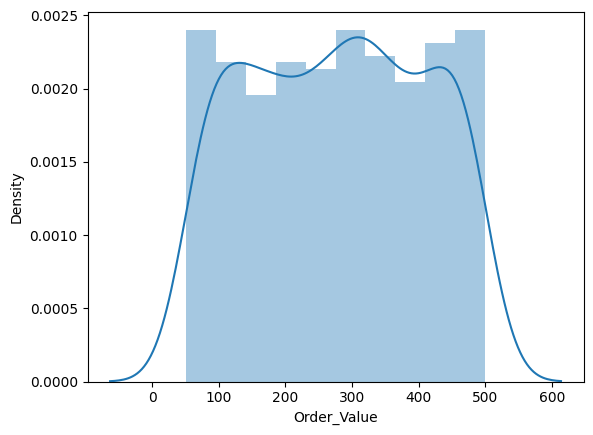

In [102]:
sns.distplot(df['Order_Value'], bins=10, kde=True)
plt.xlabel('Order_Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'xlabel'

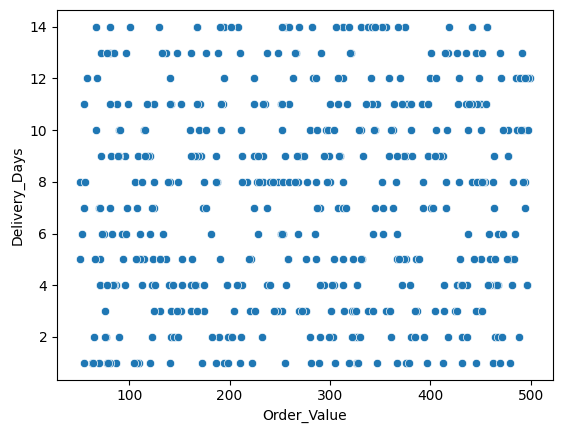

In [109]:
sns.distplot(df['Order_Value'], bins=10, kde=True)
plt.xlabel('Order_Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()